In [166]:
import pickle

# Load entrenamiento.p
with open('./data/entrenamiento.p', 'rb') as file:
    entrenamiento_data = pickle.load(file)

# Load prueba.p
with open('./data/prueba.p', 'rb') as file:
    prueba_data = pickle.load(file)

# Load validacion.p
with open('./data/validacion.p', 'rb') as file:
    validacion_data = pickle.load(file)

In [167]:
import numpy as np
from PIL import Image

def preprocess_image(image_array, target_size=(64, 64)):  
    image = Image.fromarray(image_array)
    image = image.convert('L') 
    image = image.resize(target_size)  
    image = np.array(image, dtype=np.float32) / 255.0 
    image = np.expand_dims(image, axis=-1)  
    return image


In [168]:
all_images = np.concatenate((entrenamiento_data['features'], prueba_data['features'], validacion_data['features']), axis=0)

preprocessed_images = [preprocess_image(image) for image in all_images]


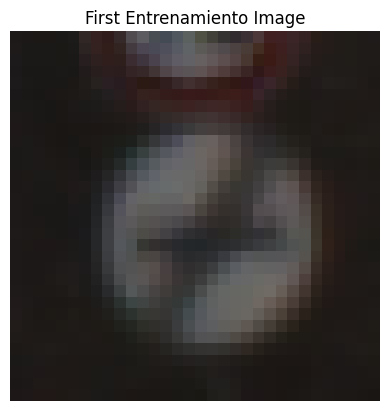

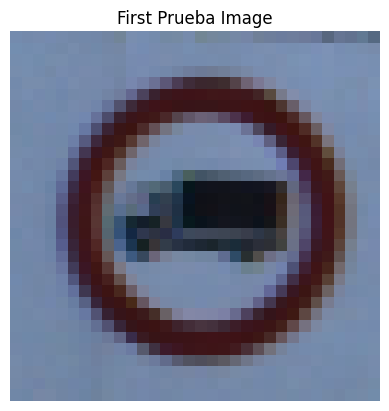

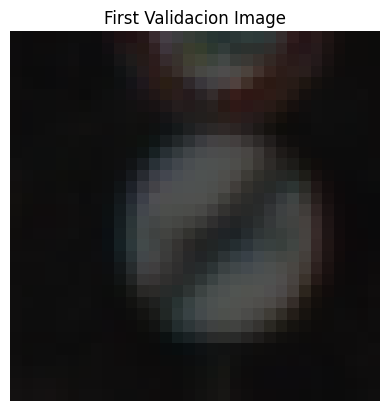

In [169]:
import matplotlib.pyplot as plt

def show_image(image, title):
    plt.imshow(image.squeeze())
    plt.title(title)
    plt.axis('off')
    plt.show()

# Show the first image of each set
show_image(entrenamiento_data['features'][0], 'First Entrenamiento Image')
show_image(prueba_data['features'][0], 'First Prueba Image')
show_image(validacion_data['features'][0], 'First Validacion Image')

In [170]:
num_entrenamiento = len(entrenamiento_data['features'])
num_prueba = len(prueba_data['features'])
num_validacion = len(validacion_data['features'])

entrenamiento_data['features'] = preprocessed_images[:num_entrenamiento]
prueba_data['features'] = preprocessed_images[num_entrenamiento:num_entrenamiento + num_prueba]
validacion_data['features'] = preprocessed_images[num_entrenamiento + num_prueba:]

print(f"Shape of first entrenamiento image: {entrenamiento_data['features'][0].shape}")
print(f"Shape of first prueba image: {prueba_data['features'][0].shape}")
print(f"Shape of first validacion image: {validacion_data['features'][0].shape}")

Shape of first entrenamiento image: (64, 64, 1)
Shape of first prueba image: (64, 64, 1)
Shape of first validacion image: (64, 64, 1)


In [171]:
train_images = np.array(entrenamiento_data['features'])
train_labels = np.array(entrenamiento_data['labels'])

test_images = np.array(prueba_data['features'])
test_labels = np.array(prueba_data['labels'])

valid_images = np.array(validacion_data['features'])
valid_labels = np.array(validacion_data['labels'])

num_classes = len(np.unique(train_labels))
num_classes

43

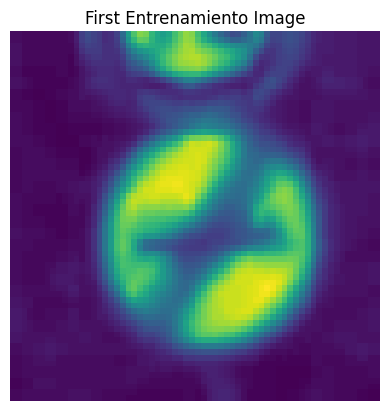

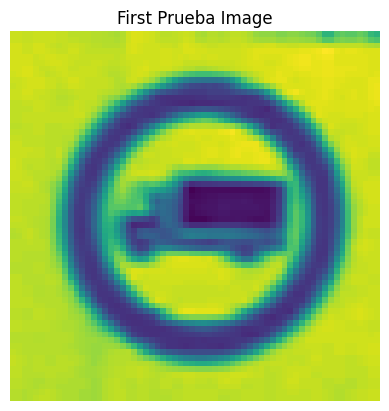

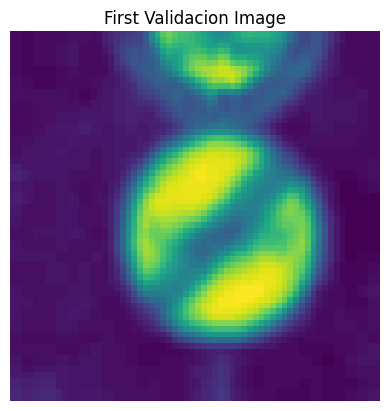

In [172]:
show_image(entrenamiento_data['features'][0], 'First Entrenamiento Image')
show_image(prueba_data['features'][0], 'First Prueba Image')
show_image(validacion_data['features'][0], 'First Validacion Image')

In [173]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

In [174]:
def create_lenet_model(input_shape):
    model = models.Sequential()
    
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(120, activation='relu'))
    
    model.add(layers.Dense(84, activation='relu'))
    
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    return model

In [175]:
input_shape = (64, 64, 1)  # Example input shape for grayscale images of size 32x32
model = create_lenet_model(input_shape)
optimizer = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\Mendez\Desktop\U\DS\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


La función de pérdida es crucial en el modelo porque mide qué tan lejos están las predicciones del modelo de los valores reales. Es el criterio que guía el aprendizaje, ya que el objetivo es minimizar esta pérdida para mejorar la precisión del modelo.

El optimizador es el algoritmo que ajusta los parámetros del modelo, como los pesos en una red neuronal, para minimizar la función de pérdida. Actúa sobre la base del gradiente de la pérdida respecto a los parámetros, moviéndose en la dirección que reduce la pérdida más rápidamente, lo que acelera y mejora el proceso de aprendizaje.

In [176]:

train_images = train_images / 255.0

model.fit(train_images, train_labels, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
870/870 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.0630 - loss: 3.5060 - val_accuracy: 0.0000e+00 - val_loss: 6.8531
Epoch 2/30
870/870 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0697 - loss: 3.3483 - val_accuracy: 0.0000e+00 - val_loss: 7.4304
Epoch 3/30
870/870 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0705 - loss: 3.3465 - val_accuracy: 0.0000e+00 - val_loss: 8.3754
Epoch 4/30
870/870 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.0669 - loss: 3.3304 - val_accuracy: 0.0000e+00 - val_loss: 8.4863
Epoch 5/30
870/870 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0703 - loss: 3.3336 - val_accuracy: 0.0000e+00 - val_loss: 8.6505
Epoch 6/30
870/870 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0682 - loss: 3.3386 - val_accuracy: 0.0000e+00 - val_loss: 9.1735
Epoch 7/30
870/870 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0696 - loss: 3.3376 - val_accuracy: 0.0000e+00 - val_loss: 9.8080
Epoch 8/30
870/870 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0697 - los

### Proceso de Entrenamiento:

1. **Forward Propagation:** 
    - Los datos de entrada se pasan a través de la red neuronal, produciendo una predicción.
  
2. **Cálculo de la Pérdida:** 
    - Se utiliza una función de pérdida para medir qué tan lejos está la predicción de la red de los valores reales.
  
3. **Backward Propagation:** 
    - Se calcula el gradiente de la pérdida con respecto a los pesos de la red neuronal utilizando el algoritmo de retropropagación. Esto indica la dirección en la que los pesos deben ajustarse para reducir la pérdida.
  
4. **Actualización de los Pesos:** 
    - El optimizador utiliza los gradientes calculados para ajustar los pesos de la red en un intento de minimizar la función de pérdida.

### Data en lotes:
- La función de tensorflow.keras '.fit' se encarga de este proceso. Al enviarle un batch_size=32, significa que siempre evaluará un lote de 32 antes de actualizar los pesos.


In [177]:
from sklearn.metrics import classification_report
import numpy as np

test_images = test_images / 255.0

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy}")

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(test_images)

# Convertir probabilidades a clases predichas
y_pred_classes = np.argmax(predictions, axis=1)
y_true = test_labels 

print(classification_report(y_true, y_pred_classes))

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4563 - loss: 19.2333
Test accuracy: 0.4598574936389923
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.34      0.85      0.49       720
           2       0.00      0.00      0.00       750
           3       0.23      0.23      0.23       450
           4       0.38      0.43      0.40       660
           5       0.26      0.58      0.36       630
           6       0.56      0.51      0.54       150
           7       0.32      0.34      0.33       450
           8       0.18      0.11      0.14       450
           9       0.50      0.43      0.46       480
          10       0.61      0.81      0.69       660
          11       0.56      0.74      0.64       420
          12       0.60      0.24      0.35       690
          13       0.70      0.95      0.81       720
          14       0.00      0.00     

c:\Users\Mendez\Desktop\U\DS\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mendez\Desktop\U\DS\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mendez\Desktop\U\DS\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
